## Sales prediction of a Product After Investing million dollars on different channels
Dataset : Advertising.csv

Dataset Description
The Advertising.csv dataset typically contains the following columns:

TV: Advertising budget spent on TV (in thousands of dollars).
Radio: Advertising budget spent on radio.
Newspaper: Advertising budget spent on newspapers.
Sales: The target variable (sales in thousands of units).



# Load and explore the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the dataset
Record = pd.read_csv('Advertising.csv')

data = pd.DataFrame(Record)

#Display the first few rows
print(data.head())

#Check for missing values
print(data.isnull().sum())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


## Preprocess the data

In [2]:
X = data[['TV','newspaper','radio']]
y = data['sales']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [3]:
##Fit and the prediction by model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
#Prediction by model on test set
y_pred = model.predict(X_test)


#Evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_pred,y_test)

print(f"The mse of this Model is  {mse}")


The mse of this Model is  3.1740973539761046


## Implementing cost function or mse  from Scratch but on real world datset(wihut scikit learn)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Custom MSE function
def compute_cost(X_test, y_test):
    m = len(y_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors = y_pred - y_test
    squared_errors = errors ** 2
    cost = (1 / m) * np.sum(squared_errors)
    return cost

# Compare custom MSE with library
cost = compute_cost(X_test, y_test)
print(f"Custom MSE: {cost}")

from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(f"Sklearn MSE: {mean_squared_error(y_test, y_pred)}")


Custom MSE: 3.174097353976105
Sklearn MSE: 3.1740973539761046


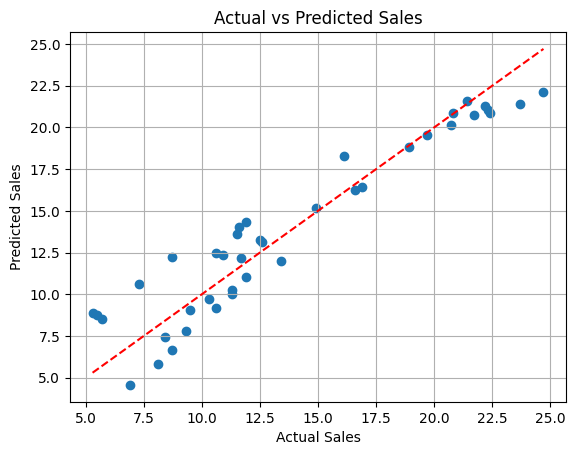

In [8]:
#Plot
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()


## Implemenation of Gradient descent on the dataset

In [3]:
X = data[['TV','radio','newspaper']].values #features
y = data['sales'].values.reshape(-1,1) #Target (reshape to column vector)

# Add bias term (column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split into train and test sets (optional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Implement gradient descent
def compute_cost(X, y, theta):
    """Compute the MSE cost function."""
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    """Perform gradient descent to minimize MSE."""
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)  # Compute gradient
        theta -= learning_rate * gradient    # Update parameters
        cost_history[i] = compute_cost(X, y, theta)  # Track cost

    return theta, cost_history

In [6]:
# Initialize parameters (theta = [bias, w1, w2, w3])
theta = np.zeros((X_train.shape[1], 1))

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

print("Final parameters (theta):", theta_final.flatten())


Final parameters (theta): [nan nan nan nan]


C:\Users\Gairo\AppData\Local\Temp\ipykernel_19612\2316785893.py:7: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(error ** 2)
C:\Users\Gairo\AppData\Local\Temp\ipykernel_19612\2316785893.py:18: RuntimeWarning: overflow encountered in dot
  gradient = (1 / m) * X.T.dot(error)  # Compute gradient
C:\Users\Gairo\AppData\Local\Temp\ipykernel_19612\2316785893.py:18: RuntimeWarning: invalid value encountered in dot
  gradient = (1 / m) * X.T.dot(error)  # Compute gradient
C:\Users\Gairo\AppData\Local\Temp\ipykernel_19612\2316785893.py:19: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient    # Update parameters


Test MSE: nan


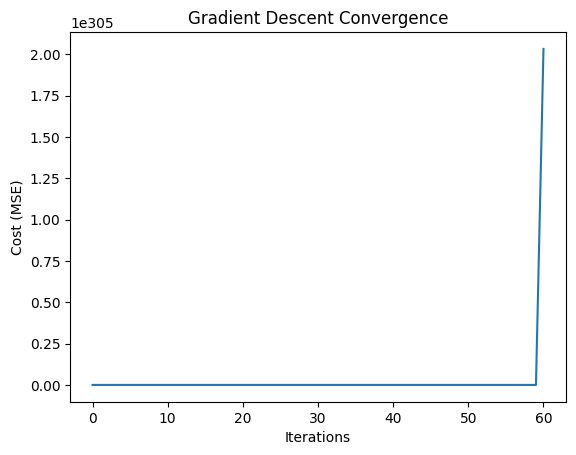

In [7]:
# Predict on test set
y_pred = X_test.dot(theta_final)

# Calculate test MSE
test_mse = compute_cost(X_test, y_test, theta_final)
print(f"Test MSE: {test_mse:.2f}")

# Plot cost history
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Train using Scikit-Learn
model = LinearRegression()
model.fit(X_train, y_train)

# Compare coefficients
print("Scikit-Learn Coefficients:", model.intercept_, model.coef_)
print("Your GD Coefficients:", theta_final.flatten())

Scikit-Learn Coefficients: [2.97906734] [[0.         0.04472952 0.18919505 0.00276111]]
Your GD Coefficients: [nan nan nan nan]
